<a href="https://colab.research.google.com/github/mkjubran/OGAN-results/blob/main/PlotCurvesOGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

Loading Results

In [151]:
!rm -rf ./OGAN-results
!git clone https://github.com/mkjubran/OGAN-results.git

Cloning into 'OGAN-results'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 27 (delta 9), reused 8 (delta 1), pack-reused 0
Unpacking objects: 100% (27/27), done.


##MNIST image size 32

In [152]:
df = pd.read_csv('/content/OGAN-results/output-mnist32.csv')
df=df[1:]
imageSize=32

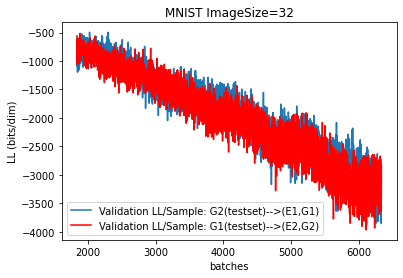

In [153]:
VLL = [col for col in df if col.startswith('Validation LL/Sample')]
df_VLLb = df[VLL]
df_VLLb = df_VLLb.dropna()
df_VLLb = df_VLLb.astype('float')
df_VLLb = df_VLLb[0:epoch*batch]
ax = plt.gca()
df_VLLb['Validation LL/Sample: G2(testset)-->(E1,G1)'].plot(kind='line',ax=ax)
df_VLLb['Validation LL/Sample: G1(testset)-->(E2,G2)'].plot(kind='line', color='red', ax=ax)
plt.xlabel('batches')
plt.ylabel('LL (bits/dim)')
plt.legend()
plt.title('MNIST ImageSize=32')
plt.show()

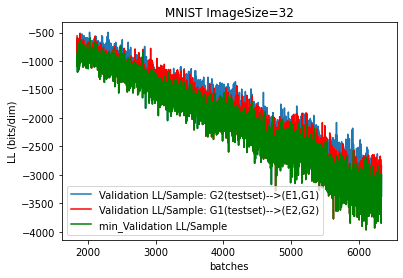

In [154]:
df_VLLb['min_Validation LL/Sample'] = df_VLLb[['Validation LL/Sample: G2(testset)-->(E1,G1)','Validation LL/Sample: G1(testset)-->(E2,G2)']].min(axis=1)

ax = plt.gca()
df_VLLb['Validation LL/Sample: G2(testset)-->(E1,G1)'].plot(kind='line',ax=ax)
df_VLLb['Validation LL/Sample: G1(testset)-->(E2,G2)'].plot(kind='line', color='red', ax=ax)
df_VLLb['min_Validation LL/Sample'].plot(kind='line', color='green', ax=ax)
plt.xlabel('batches')
plt.ylabel('LL (bits/dim)')
plt.legend()
plt.title('MNIST ImageSize=32')
plt.show()


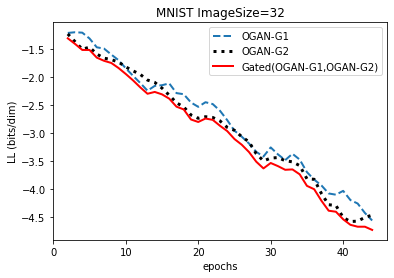

In [155]:
epoch=45
batch=100

VLL = [col for col in df if col.startswith('Validation LL/epoch')]
df_VLLe = df[VLL]
df_VLLe = df_VLLe.dropna()
df_VLLe = df_VLLe.astype('float')


VLL = [col for col in df if col.startswith('Validation LL/Sample')]
df_VLLb = df[VLL]
df_VLLb = df_VLLb.dropna()
df_VLLb = df_VLLb.astype('float')
df_VLLb = df_VLLb[0:epoch*batch]

df_VLLb['min_Validation LL/Sample'] = df_VLLb[['Validation LL/Sample: G2(testset)-->(E1,G1)','Validation LL/Sample: G1(testset)-->(E2,G2)']].min(axis=1)

df_VLLe['Validation LL/epoch: min(G1+G2) (bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['min_Validation LL/Sample']/(math.log(2)*(imageSize**2))
df_VLLe['Validation LL/epoch G1(bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['Validation LL/Sample: G2(testset)-->(E1,G1)']/(math.log(2)*(imageSize**2))
df_VLLe['Validation LL/epoch G2(bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['Validation LL/Sample: G1(testset)-->(E2,G2)']/(math.log(2)*(imageSize**2))

ax = plt.gca()
df_VLLe['Validation LL/epoch G1(bits/dim)'].plot(kind='line', ax=ax, linestyle='--', linewidth=2, label='OGAN-G1')
df_VLLe['Validation LL/epoch G2(bits/dim)'].plot(kind='line', color='k', ax=ax, linestyle=':', linewidth=3, label='OGAN-G2')
df_VLLe['Validation LL/epoch: min(G1+G2) (bits/dim)'].plot(kind='line', color='r', ax=ax, linewidth=2, label='Gated(OGAN-G1,OGAN-G2)')
plt.xlabel('epochs')
plt.ylabel('LL (bits/dim)')
plt.legend()
plt.title('MNIST ImageSize=32')
plt.show()



##CIFAR10 image size 32

In [156]:
df = pd.read_csv('/content/OGAN-results/output-cifar32.csv')
df=df[1:]
imageSize=32

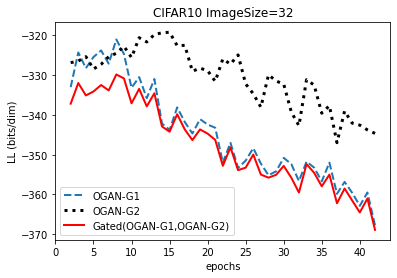

In [157]:
epoch=45
batch=100

VLL = [col for col in df if col.startswith('Validation LL/epoch')]
df_VLLe = df[VLL]
df_VLLe = df_VLLe.dropna()
df_VLLe = df_VLLe.astype('float')


VLL = [col for col in df if col.startswith('Validation LL/Sample')]
df_VLLb = df[VLL]
df_VLLb = df_VLLb.dropna()
df_VLLb = df_VLLb.astype('float')
df_VLLb = df_VLLb[0:epoch*batch]

df_VLLb['min_Validation LL/Sample'] = df_VLLb[['Validation LL/Sample: G2(testset)-->(E1,G1)','Validation LL/Sample: G1(testset)-->(E2,G2)']].min(axis=1)

df_VLLe['Validation LL/epoch: min(G1+G2) (bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['min_Validation LL/Sample']/(math.log(2)*(imageSize**2))
df_VLLe['Validation LL/epoch G1(bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['Validation LL/Sample: G2(testset)-->(E1,G1)']/(math.log(2)*(imageSize**2))
df_VLLe['Validation LL/epoch G2(bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['Validation LL/Sample: G1(testset)-->(E2,G2)']/(math.log(2)*(imageSize**2))

ax = plt.gca()
df_VLLe['Validation LL/epoch G1(bits/dim)'].plot(kind='line', ax=ax, linestyle='--', linewidth=2, label='OGAN-G1')
df_VLLe['Validation LL/epoch G2(bits/dim)'].plot(kind='line', color='k', ax=ax, linestyle=':', linewidth=3, label='OGAN-G2')
df_VLLe['Validation LL/epoch: min(G1+G2) (bits/dim)'].plot(kind='line', color='r', ax=ax, linewidth=2, label='Gated(OGAN-G1,OGAN-G2)')
plt.xlabel('epochs')
plt.ylabel('LL (bits/dim)')
plt.legend()
plt.title('CIFAR10 ImageSize=32')
plt.show()



##celeba image size 32

In [158]:
df = pd.read_csv('/content/OGAN-results/output-celeba32.csv')
df=df[1:]
imageSize=32

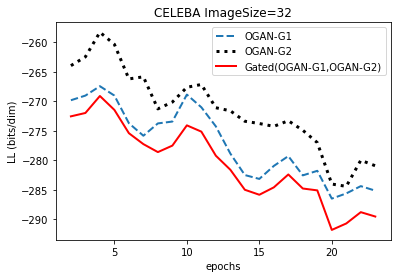

In [159]:
epoch=45
batch=100

VLL = [col for col in df if col.startswith('Validation LL/epoch')]
df_VLLe = df[VLL]
df_VLLe = df_VLLe.dropna()
df_VLLe = df_VLLe.astype('float')


VLL = [col for col in df if col.startswith('Validation LL/Sample')]
df_VLLb = df[VLL]
df_VLLb = df_VLLb.dropna()
df_VLLb = df_VLLb.astype('float')
df_VLLb = df_VLLb[0:epoch*batch]

df_VLLb['min_Validation LL/Sample'] = df_VLLb[['Validation LL/Sample: G2(testset)-->(E1,G1)','Validation LL/Sample: G1(testset)-->(E2,G2)']].min(axis=1)

df_VLLe['Validation LL/epoch: min(G1+G2) (bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['min_Validation LL/Sample']/(math.log(2)*(imageSize**2))
df_VLLe['Validation LL/epoch G1(bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['Validation LL/Sample: G2(testset)-->(E1,G1)']/(math.log(2)*(imageSize**2))
df_VLLe['Validation LL/epoch G2(bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['Validation LL/Sample: G1(testset)-->(E2,G2)']/(math.log(2)*(imageSize**2))

ax = plt.gca()
df_VLLe['Validation LL/epoch G1(bits/dim)'].plot(kind='line', ax=ax, linestyle='--', linewidth=2, label='OGAN-G1')
df_VLLe['Validation LL/epoch G2(bits/dim)'].plot(kind='line', color='k', ax=ax, linestyle=':', linewidth=3, label='OGAN-G2')
df_VLLe['Validation LL/epoch: min(G1+G2) (bits/dim)'].plot(kind='line', color='r', ax=ax, linewidth=2, label='Gated(OGAN-G1,OGAN-G2)')
plt.xlabel('epochs')
plt.ylabel('LL (bits/dim)')
plt.legend()
plt.title('CELEBA ImageSize=32')
plt.show()



##MNIST image size 64

In [160]:
df = pd.read_csv('/content/OGAN-results/output-mnist64.csv')
df=df[1:]
imageSize=64

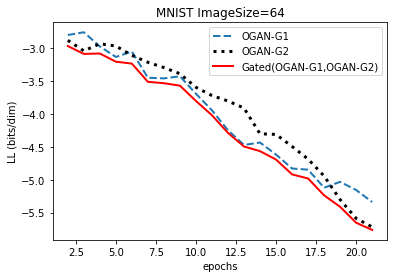

In [161]:
epoch=45
batch=100

VLL = [col for col in df if col.startswith('Validation LL/epoch')]
df_VLLe = df[VLL]
df_VLLe = df_VLLe.dropna()
df_VLLe = df_VLLe.astype('float')


VLL = [col for col in df if col.startswith('Validation LL/Sample')]
df_VLLb = df[VLL]
df_VLLb = df_VLLb.dropna()
df_VLLb = df_VLLb.astype('float')
df_VLLb = df_VLLb[0:epoch*batch]

df_VLLb['min_Validation LL/Sample'] = df_VLLb[['Validation LL/Sample: G2(testset)-->(E1,G1)','Validation LL/Sample: G1(testset)-->(E2,G2)']].min(axis=1)

df_VLLe['Validation LL/epoch: min(G1+G2) (bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['min_Validation LL/Sample']/(math.log(2)*(imageSize**2))
df_VLLe['Validation LL/epoch G1(bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['Validation LL/Sample: G2(testset)-->(E1,G1)']/(math.log(2)*(imageSize**2))
df_VLLe['Validation LL/epoch G2(bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['Validation LL/Sample: G1(testset)-->(E2,G2)']/(math.log(2)*(imageSize**2))

ax = plt.gca()
df_VLLe['Validation LL/epoch G1(bits/dim)'].plot(kind='line', ax=ax, linestyle='--', linewidth=2, label='OGAN-G1')
df_VLLe['Validation LL/epoch G2(bits/dim)'].plot(kind='line', color='k', ax=ax, linestyle=':', linewidth=3, label='OGAN-G2')
df_VLLe['Validation LL/epoch: min(G1+G2) (bits/dim)'].plot(kind='line', color='r', ax=ax, linewidth=2, label='Gated(OGAN-G1,OGAN-G2)')
plt.xlabel('epochs')
plt.ylabel('LL (bits/dim)')
plt.legend()
plt.title('MNIST ImageSize=64')
plt.show()

